## Principles and Applications of Data Science (Spring 2020)
## Homework 1
## Due: Apr 22, 2020

### Name:
### Student ID Number:

### Homework Description
This assignment is to practice creating a bar graph grid using the tool such as MatPlotLib with Taipei’s traffic accident data from year 101 (2012) to 108 (2019). The files we provide are the data files (xxxTraffic accident.csv) of eight years and a correspondence table for mapping codes to certain fields (Traffic accident chart.csv). In the data file, there are fifteen attributes, including ***Year, Month, Day, Hour, Minute, Processing class, death toll, Injuries Person, Vehicle type, Sex, Age, Weather, Speed limit, Road pattern, Accident location***. With the data files and table, your homework should be done according to the following **requirements**:

#### There are six main topics to be shown in each year:  
   <font color=green> 1. Number of traffic accident death toll per month <br>
   2. Number of traffic accident injuries per month <br>
   3. Number of traffic accident injuries per vehicle type (take the top 10) <br>
   4. Number of traffic accident injuries per weather <br>
   5. Number of traffic accident injuries per road pattern (take the top 10) <br>
   6. Number of traffic accident injuries per accident location (take the top 10) <br>
   </font>
#### Each topic will be presented by a bar chart.   
#### For each year, use bar graph grid to show the six topics. Thus, there will be eight grids for years and each grid has six bar charts for each topic.  

#### On the other hand, please produce the grids for the six topics respectively. Each grid will have eight bar charts for the eight years.  

#### Please do not forget, in each chart, to have the topic on the top and label the x-axis and y-axis.
#### Sample:
 
**<p><p> <font color=green size=2> Year: 101 <font>** 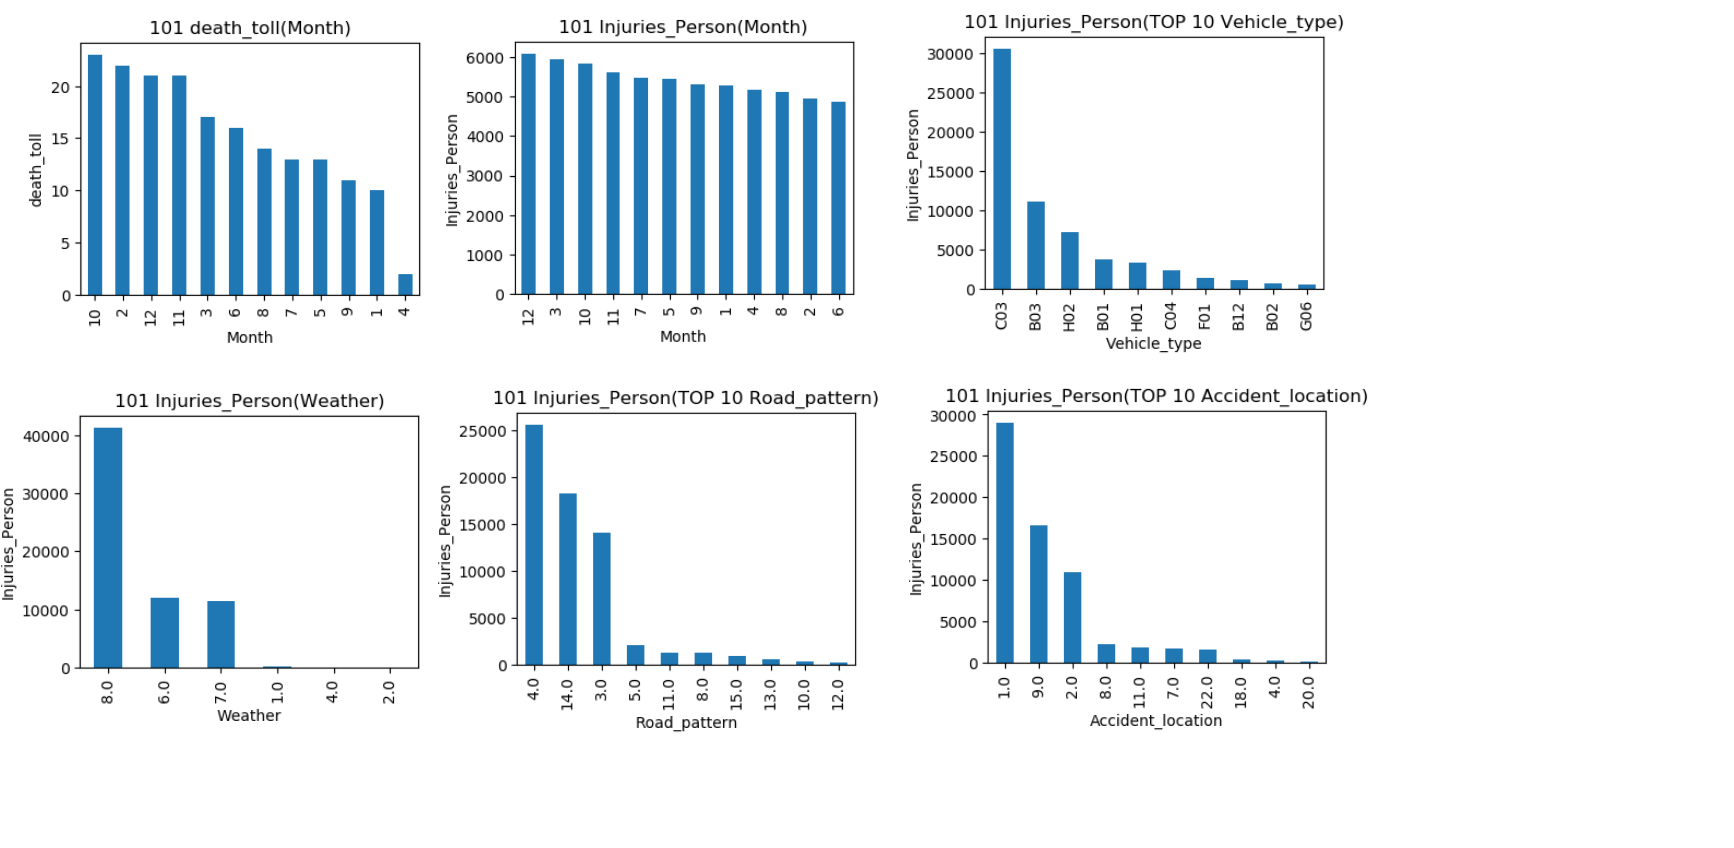
**<p><p> <font color=green size=2> Topic: top 10 Accident_location <font>** 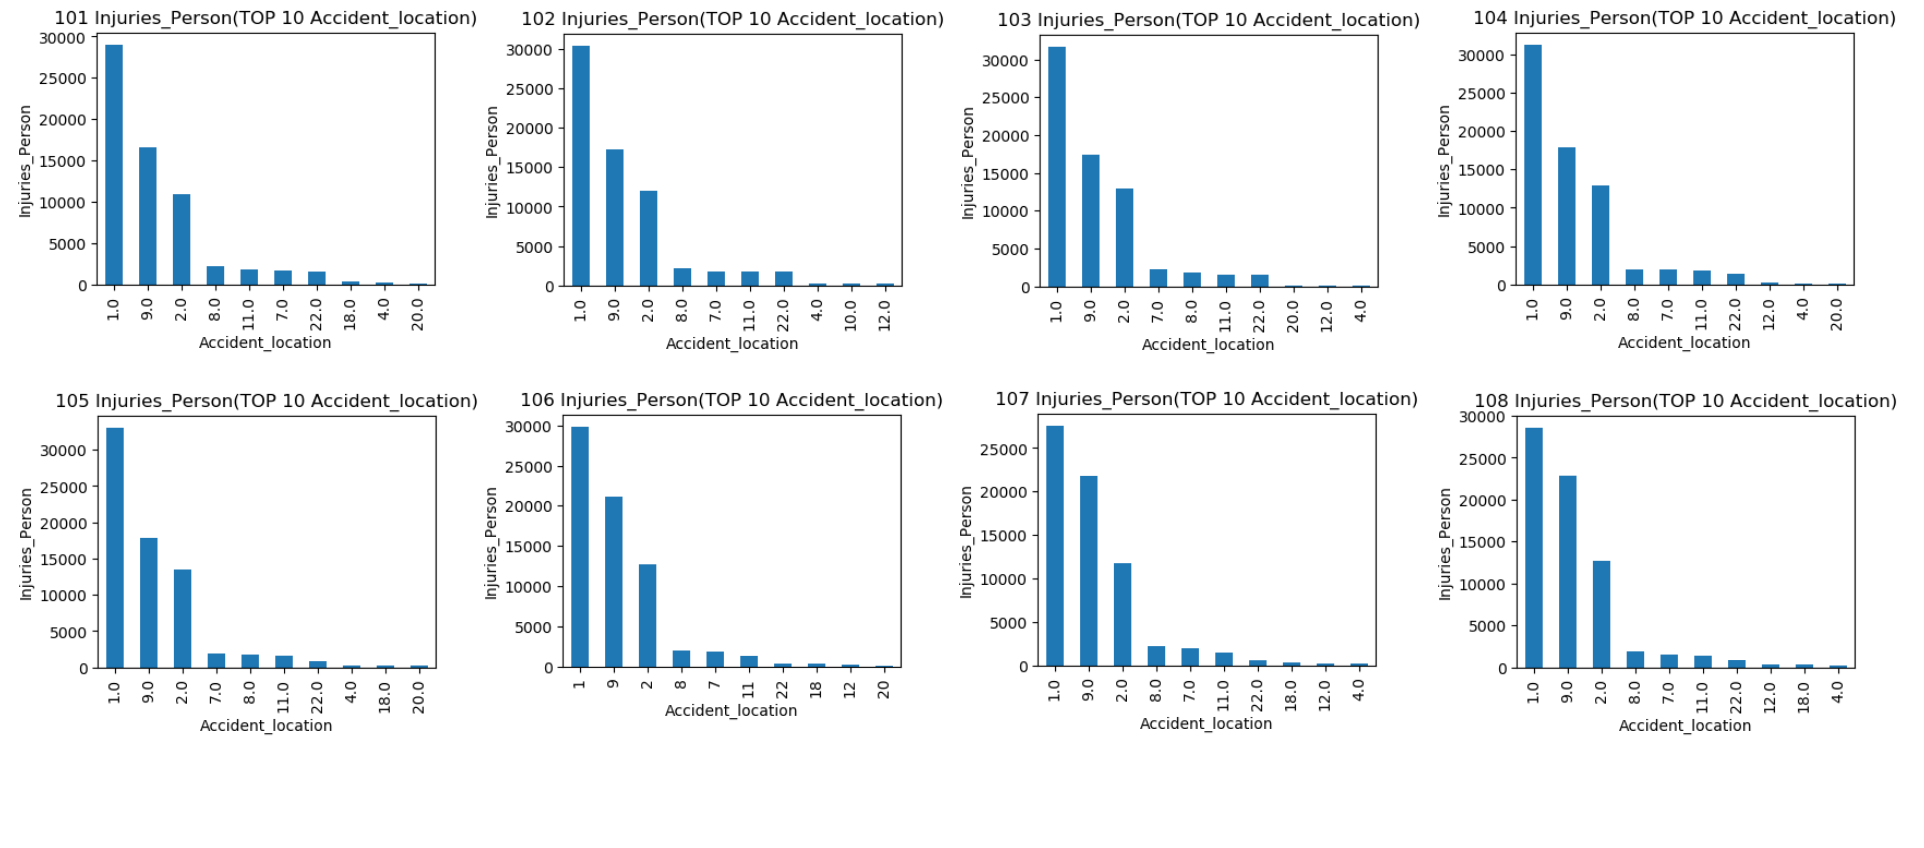

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import collections
folder="HW2_traffic_accident\\"
data_108 = pd.read_csv(folder+"108Traffic_accident.csv")
data_107 = pd.read_csv(folder+"107Traffic_accident.csv")
data_106 = pd.read_csv(folder+"106Traffic_accident.csv")
data_105 = pd.read_csv(folder+"105Traffic_accident.csv")
data_104 = pd.read_csv(folder+"104Traffic_accident.csv")
data_103 = pd.read_csv(folder+"103Traffic_accident.csv")
data_102 = pd.read_csv(folder+"102Traffic_accident.csv")
data_101 = pd.read_csv(folder+"101Traffic_accident.csv")
dataset=[data_101,data_102,data_103,data_104,data_105,data_106,data_107,data_108]
# merge(data_107,data_108,how="outer")
# data_new=pd.merge(data_new,data_106,how="outer")
# data_new=pd.merge(data_new,data_105,how="outer")
# data_new=pd.merge(data_new,data_104,how="outer")
# data_new=pd.merge(data_new,data_103,how="outer")
# data_new=pd.merge(data_new,data_102,how="outer")
# data_new=pd.merge(data_new,data_101,how="outer")
# data_new=pd.
# print(len(data_new))

In [2]:
def death_toll(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    plt.figure(figsize=(xsize, ysize))
    month=["1","2","3","4","5","6","7","8","9","10","11","12"]
    
    width=0.5
    temp={}

    data_gb_month = data.groupby("Month")
    index = np.arange(len(month))
    
    for m in month:
        count=0
        number=len(data_gb_month.get_group((int(m))))
        data_gb_dt=data_gb_month.get_group(int(m)).head(number)
        for death_num in data_gb_dt['death_toll']:
            count=count+death_num
        temp[m]=count
    temp=sorted(temp.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])

    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('month',fontsize=fontsize)
    plt.ylabel('death_toll',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"death_toll(month)")
    plt.show()


In [3]:
def Injuries_Person(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
    temp={}
    data_gb_month = data.groupby("Month")
    index = np.arange(len(month))
    for m in month:
        count=0
        number=len(data_gb_month.get_group((int(m))))
        data_gb=data_gb_month.get_group(int(m)).head(number)
        for Injuries_num in data_gb['Injuries_Person']:
            count=count+Injuries_num
        temp[m]=count
    
    temp=sorted(temp.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])

    
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('month',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(month)")
    plt.show()


In [4]:
def Vehicle_type(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
    temp=[]
    data_gb_weather = data.groupby("Vehicle_type")
    dataT=data_gb_weather.size().to_frame().reset_index()#.sort_values(by=0,ascending=False).head(len(data_gb_weather))#.to_dict()
    vehicle_list=dataT["Vehicle_type"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for v_type in vehicle_list:
        count=0
        dataT=data_gb_weather.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:
            break

    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Vehicle_type',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(TOP 10 Vehicle_type)")
    plt.show()


In [5]:
def Weather(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
    temp=[]
    data_gb_weather = data.groupby("Weather")
    dataT=data_gb_weather.size().to_frame().reset_index()#.sort_values(by=0,ascending=False).head(len(data_gb_weather))#.to_dict()
    weather_list=dataT["Weather"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for w_type in weather_list:
        count=0
        dataT=data_gb_weather.get_group(w_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[w_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Weather',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(Weather)")
    plt.show()


In [6]:
def Road_pattern(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
    temp=[]
    data_gb = data.groupby("Road_pattern")
    dataT=data_gb.size().to_frame().reset_index()#.sort_values(by=0,ascending=False).head(len(data_gb_weather))#.to_dict()
    key_list=dataT["Road_pattern"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for v_type in key_list:
        count=0
        dataT=data_gb.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:
            break

    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Road_pattern',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(TOP 10 Road_pattern)")
    plt.show()


In [7]:
def Accident_location(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
    temp=[]
    data_gb = data.groupby("Accident_location")
    dataT=data_gb.size().to_frame().reset_index()#.sort_values(by=0,ascending=False).head(len(data_gb_weather))#.to_dict()
    key_list=dataT["Accident_location"].to_list()
    dic={}
    count=0
    for v_type in key_list:
        count=0
        dataT=data_gb.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:
            break

    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Accident_location',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(TOP 10 Accident_location)")
    plt.show()


In [8]:

for col in data_101.columns: 
    print(col) 

Year
Month
Day
Hour
Minute
Processing_class
death_toll
Injuries_Person
Vehicle_type
Sex
Age
Weather
Speed_limit
Road_pattern
Accident_location


year 101


<Figure size 432x288 with 0 Axes>

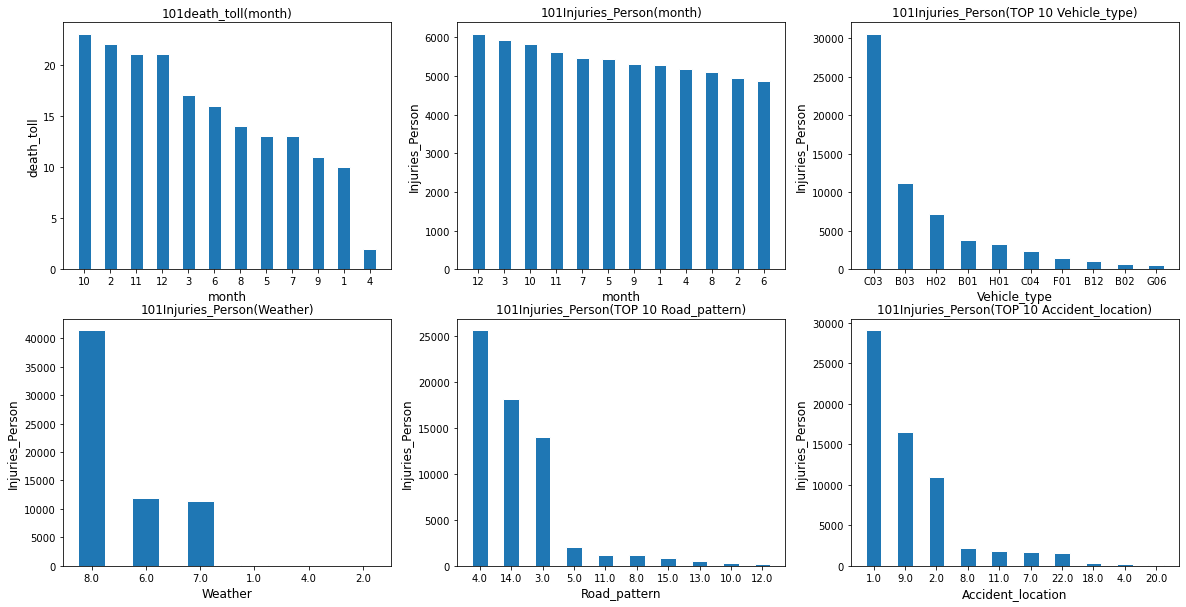

year 102


<Figure size 432x288 with 0 Axes>

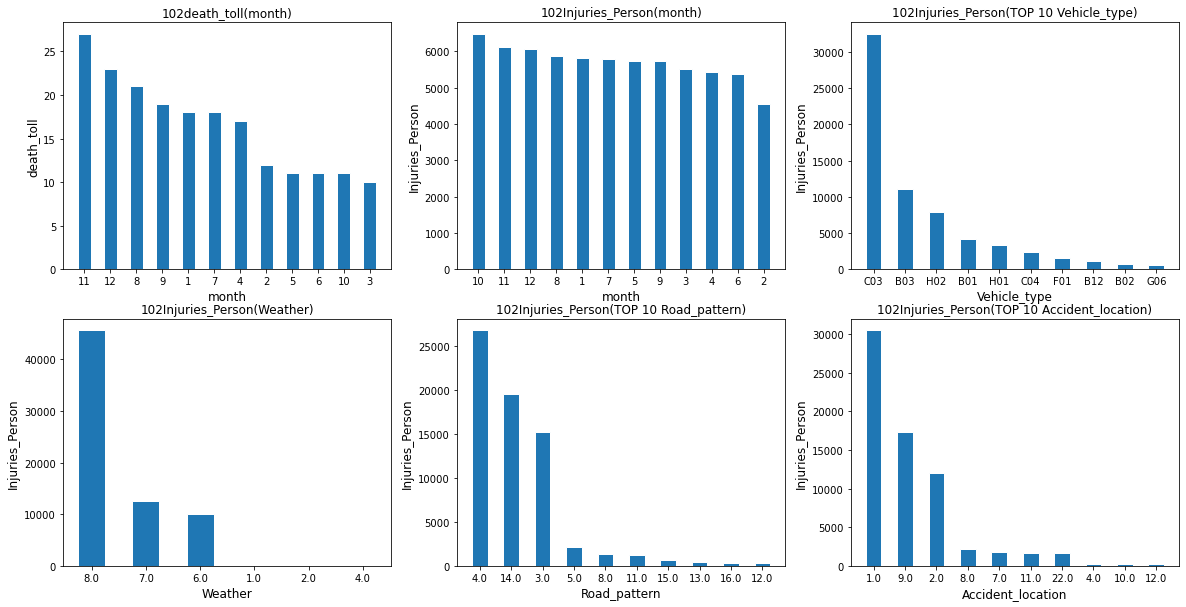

year 103


<Figure size 432x288 with 0 Axes>

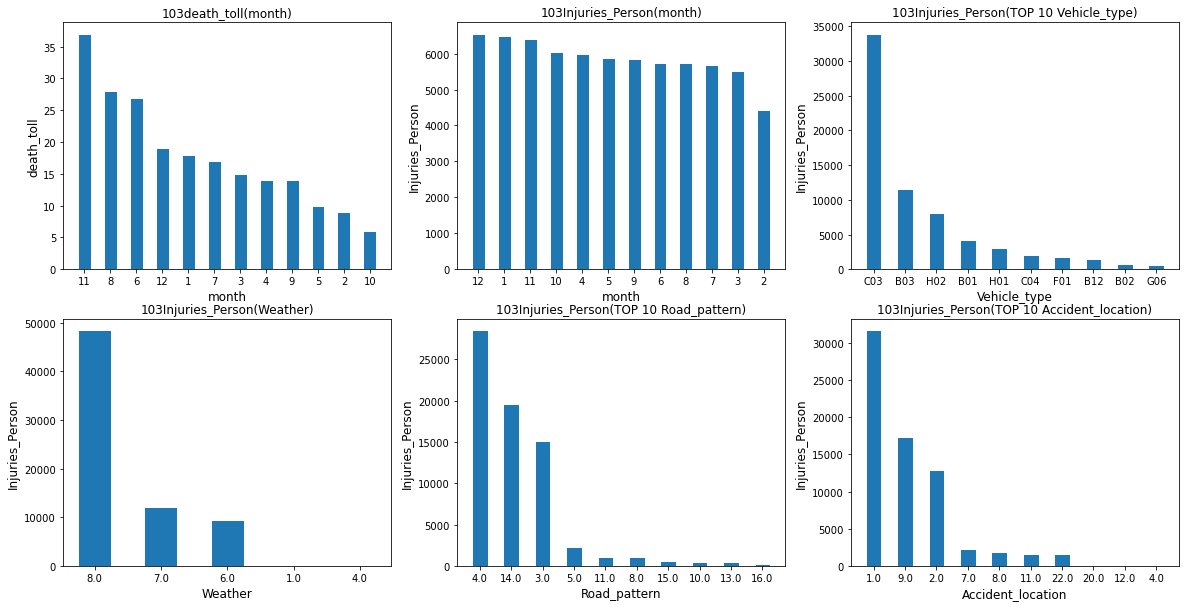

year 104


<Figure size 432x288 with 0 Axes>

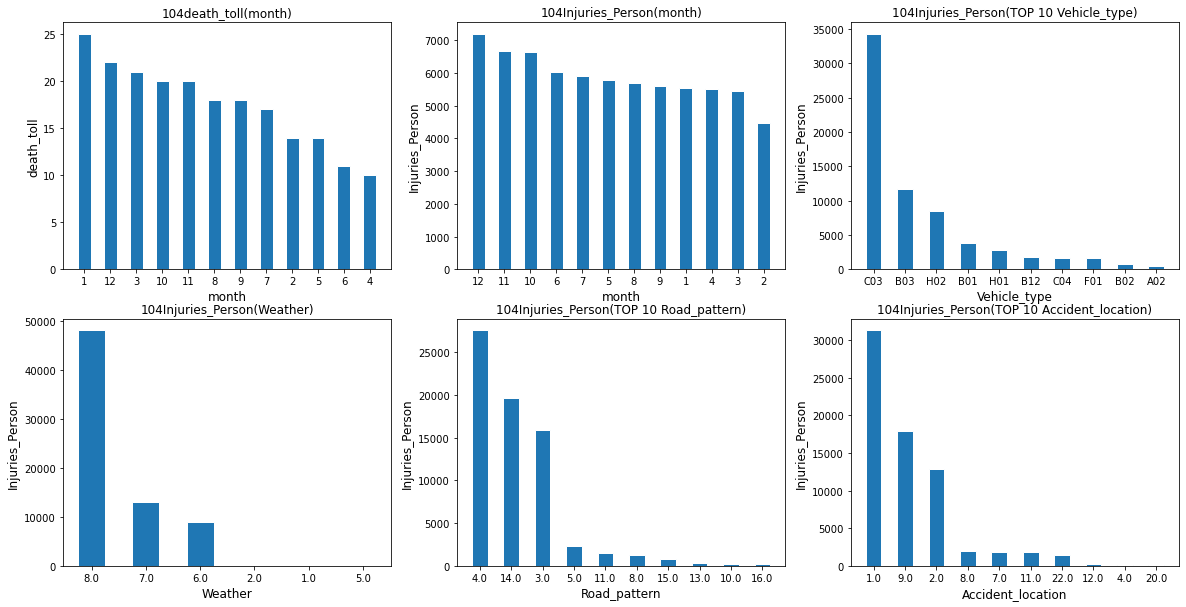

year 105


<Figure size 432x288 with 0 Axes>

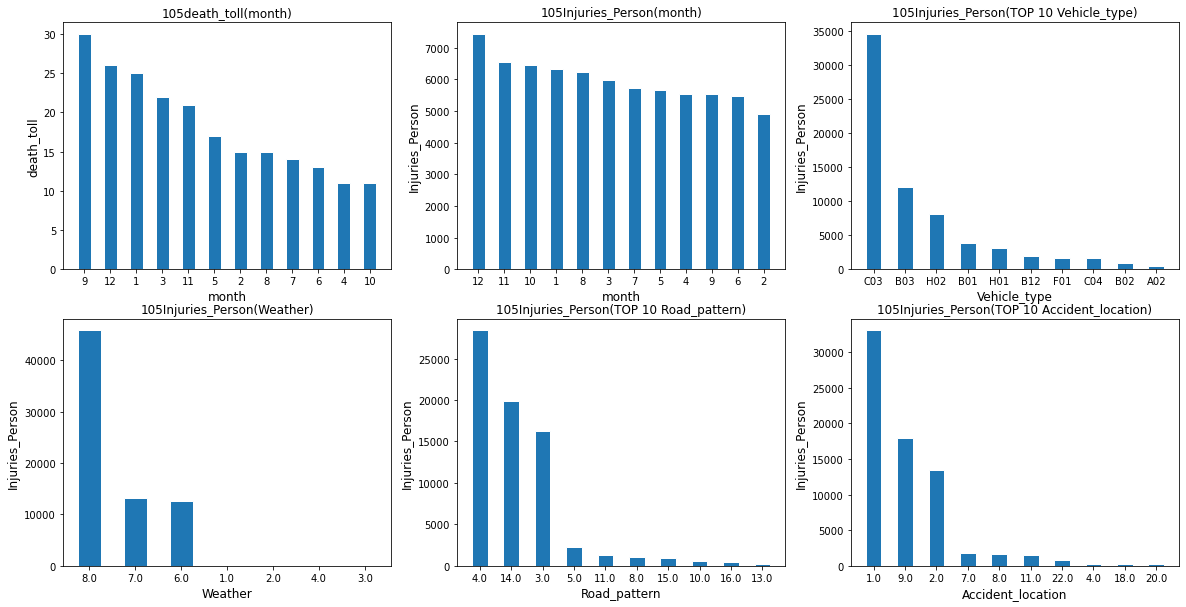

year 106


<Figure size 432x288 with 0 Axes>

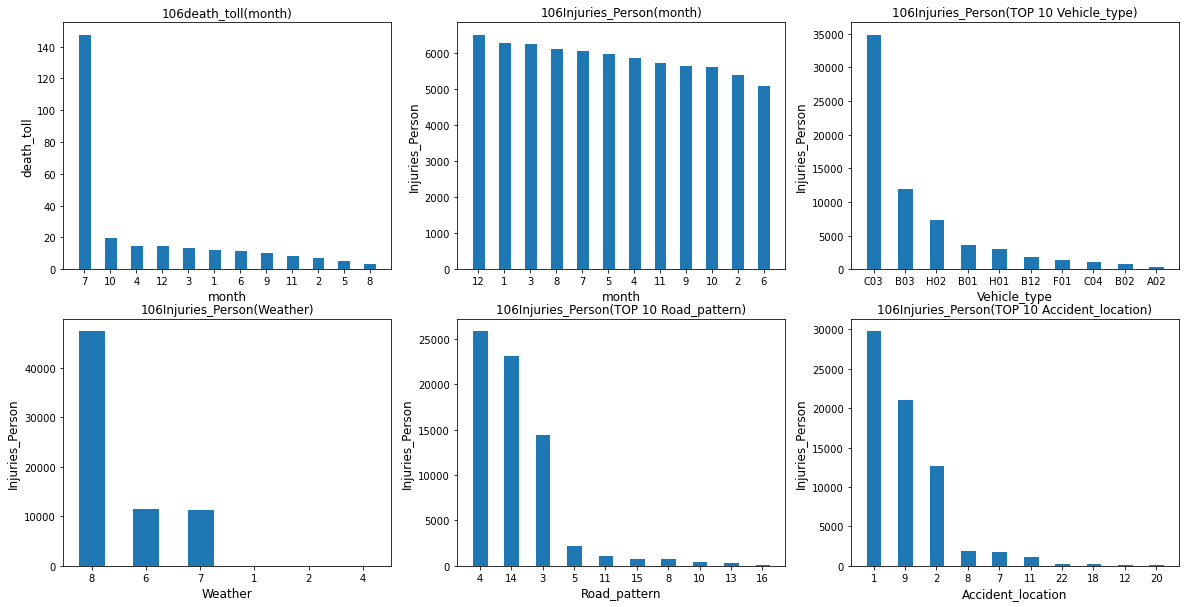

year 107


<Figure size 432x288 with 0 Axes>

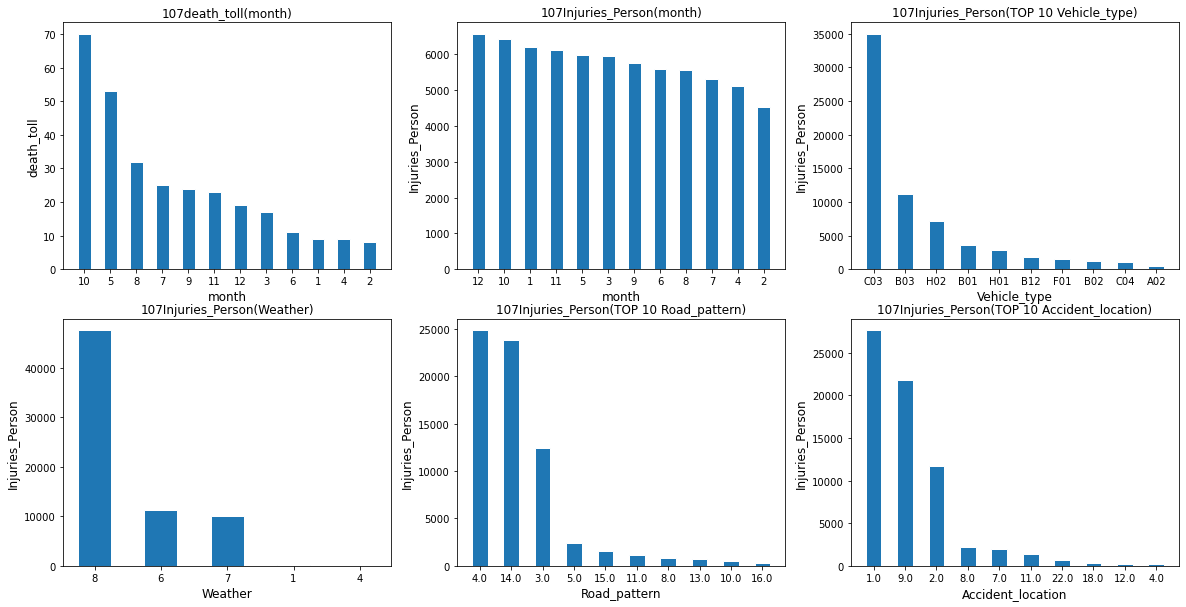

year 108


<Figure size 432x288 with 0 Axes>

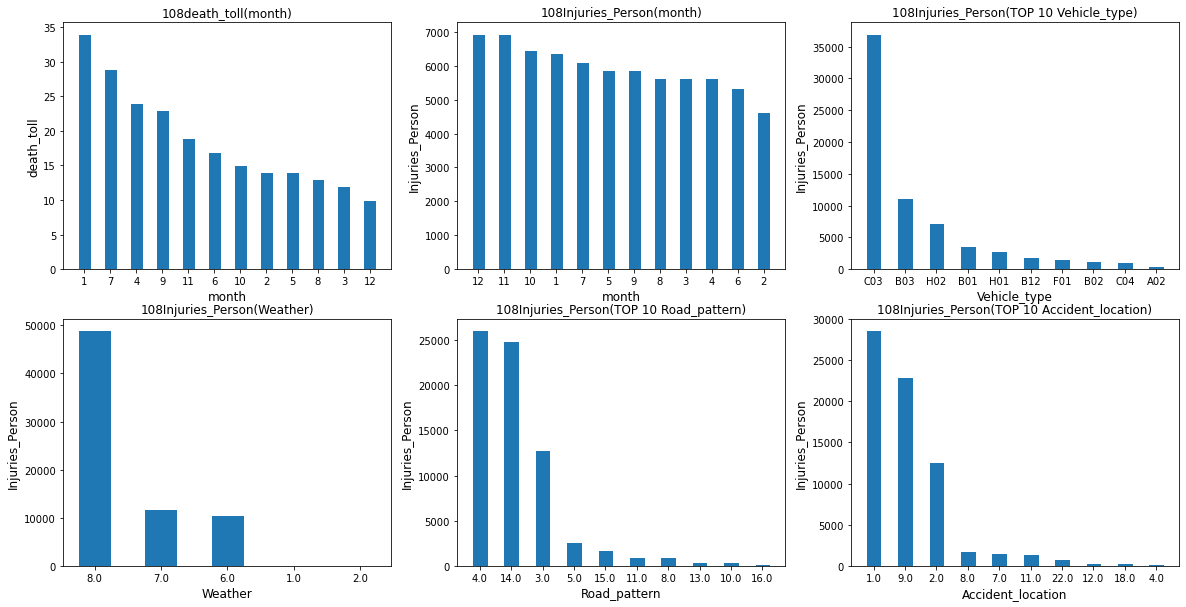

In [9]:
# fig, ax = plt.subplots()

def top_show(data,label):
    ysize=10
    xsize=20
    fontsize=12
    fontweight='blod'
    plt.subplots_adjust(wspace =1, hspace =0.5)
    plt.figure(figsize=(xsize, ysize))
#     ---------------------------------------------------death_toll(month)
    plt.subplot(231)
    month=["1","2","3","4","5","6","7","8","9","10","11","12"]
    
    width=0.5
    temp={}

    data_gb_month = data.groupby("Month")
    index = np.arange(len(month))
    
    for m in month:
        count=0
        number=len(data_gb_month.get_group((int(m))))
        data_gb_dt=data_gb_month.get_group(int(m)).head(number)
        for death_num in data_gb_dt['death_toll']:
            count=count+death_num
        temp[m]=count
    temp=sorted(temp.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])

    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('month',fontsize=fontsize)
    plt.ylabel('death_toll',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"death_toll(month)")
#     ---------------------------------------------------death_toll(month)
#     ---------------------------------------------------Injuries_Person(month)
    plt.subplot(232)
    
    temp={}
    data_gb_month = data.groupby("Month")
    index = np.arange(len(month))
    for m in month:
        count=0
        number=len(data_gb_month.get_group((int(m))))
        data_gb=data_gb_month.get_group(int(m)).head(number)
        for Injuries_num in data_gb['Injuries_Person']:
            count=count+Injuries_num
        temp[m]=count
    
    temp=sorted(temp.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])

    
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('month',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(month)")
#     ---------------------------------------------------Injuries_Person(month)
#     ---------------------------------------------------Injuries_Person(TOP 10 Vehicle_type)
    plt.subplot(233)
    
    temp=[]
    data_gb_weather = data.groupby("Vehicle_type")
    dataT=data_gb_weather.size().to_frame().reset_index()#.sort_values(by=0,ascending=False).head(len(data_gb_weather))#.to_dict()
    vehicle_list=dataT["Vehicle_type"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for v_type in vehicle_list:
        count=0
        dataT=data_gb_weather.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:
            break

    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Vehicle_type',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(TOP 10 Vehicle_type)")

#     ---------------------------------------------------Injuries_Person(TOP 10 Vehicle_type)
#     ---------------------------------------------------Injuries_Person(Weather)
    plt.subplot(234)
    
    temp=[]
    data_gb_weather = data.groupby("Weather")
    dataT=data_gb_weather.size().to_frame().reset_index()#.sort_values(by=0,ascending=False).head(len(data_gb_weather))#.to_dict()
    weather_list=dataT["Weather"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for w_type in weather_list:
        count=0
        dataT=data_gb_weather.get_group(w_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[w_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Weather',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(Weather)")

#     ---------------------------------------------------Injuries_Person(Weather)
#     ---------------------------------------------------Injuries_Person(TOP 10 Road_pattern)
    plt.subplot(235)
    
    temp=[]
    data_gb = data.groupby("Road_pattern")
    dataT=data_gb.size().to_frame().reset_index()#.sort_values(by=0,ascending=False).head(len(data_gb_weather))#.to_dict()
    key_list=dataT["Road_pattern"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for v_type in key_list:
        count=0
        dataT=data_gb.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:
            break

    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Road_pattern',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(TOP 10 Road_pattern)")

#     ---------------------------------------------------Injuries_Person(TOP 10 Road_pattern)
#     ---------------------------------------------------Injuries_Person(TOP 10 Accident_location)
    plt.subplot(236)
    
    temp=[]
    data_gb = data.groupby("Accident_location")
    dataT=data_gb.size().to_frame().reset_index()#.sort_values(by=0,ascending=False).head(len(data_gb_weather))#.to_dict()
    key_list=dataT["Accident_location"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for v_type in key_list:
        count=0
        dataT=data_gb.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:
            break

    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Accident_location',fontsize=fontsize)
    plt.ylabel('Injuries_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title(label+"Injuries_Person(TOP 10 Accident_location)")

#     ---------------------------------------------------Injuries_Person(TOP 10 Accident_location)    
    
    plt.show()

print("year 101")
top_show(dataset[0],"101")
print("year 102")
top_show(dataset[1],"102")
print("year 103")
top_show(dataset[2],"103")
print("year 104")
top_show(dataset[3],"104")
print("year 105")
top_show(dataset[4],"105")
print("year 106")
top_show(dataset[5],"106")
print("year 107")
top_show(dataset[6],"107")
print("year 108")
top_show(dataset[7],"108")

# Add xticks on the middle of the group bars

 
# Create legend & Show graphic



    




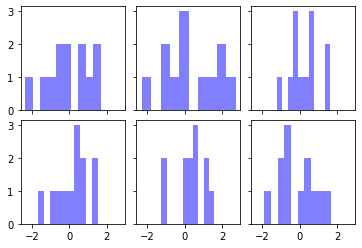

In [10]:
# fig = plt.figure()

fig, axes = plt.subplots(2,3,sharex=True,sharey=True)
for i in range(2):
    for j in range(3):
        axes[i,j].hist(np.random.randn(12),bins=10,color='b',alpha=0.5)
plt.subplots_adjust(wspace=0.1,hspace=0.1)

NameError: name 'month' is not defined

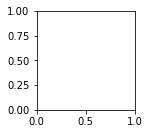

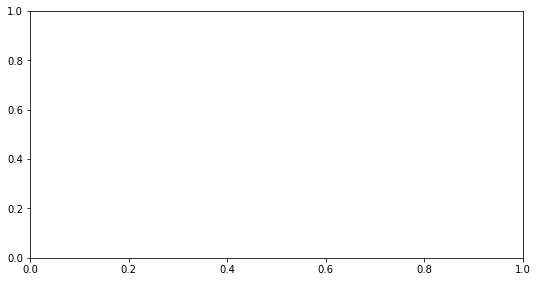

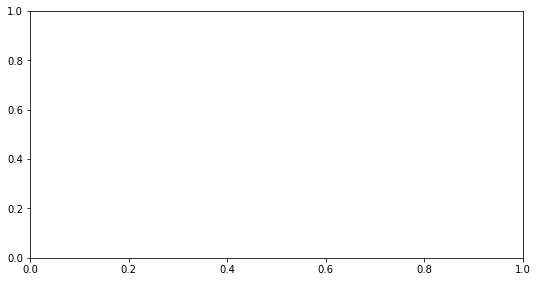

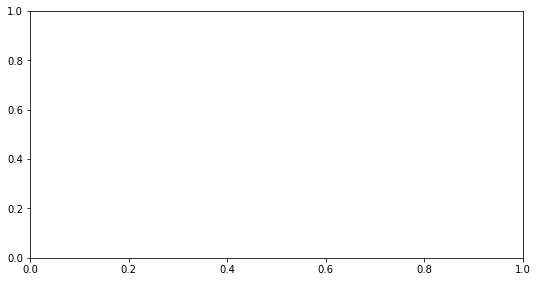

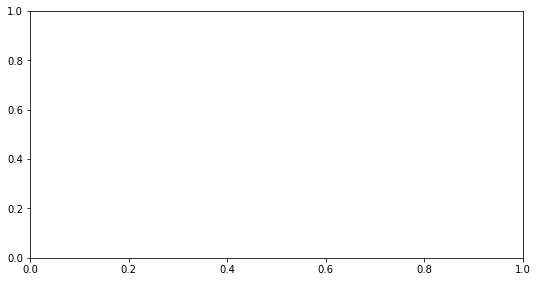

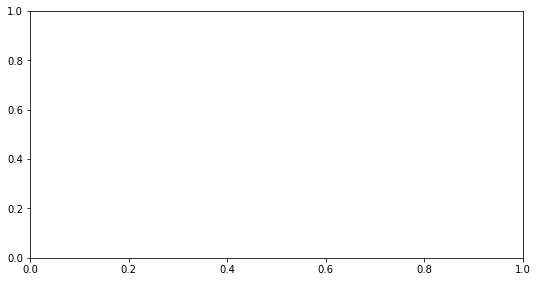

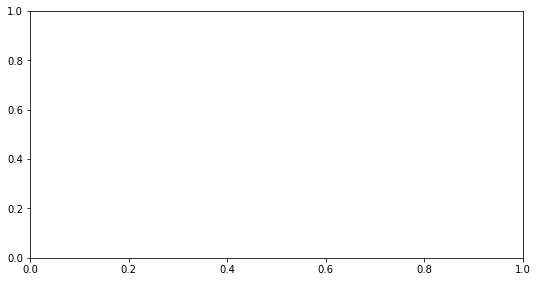

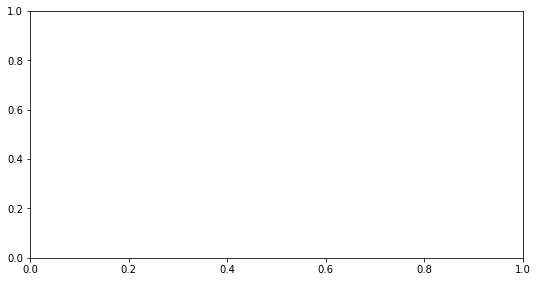

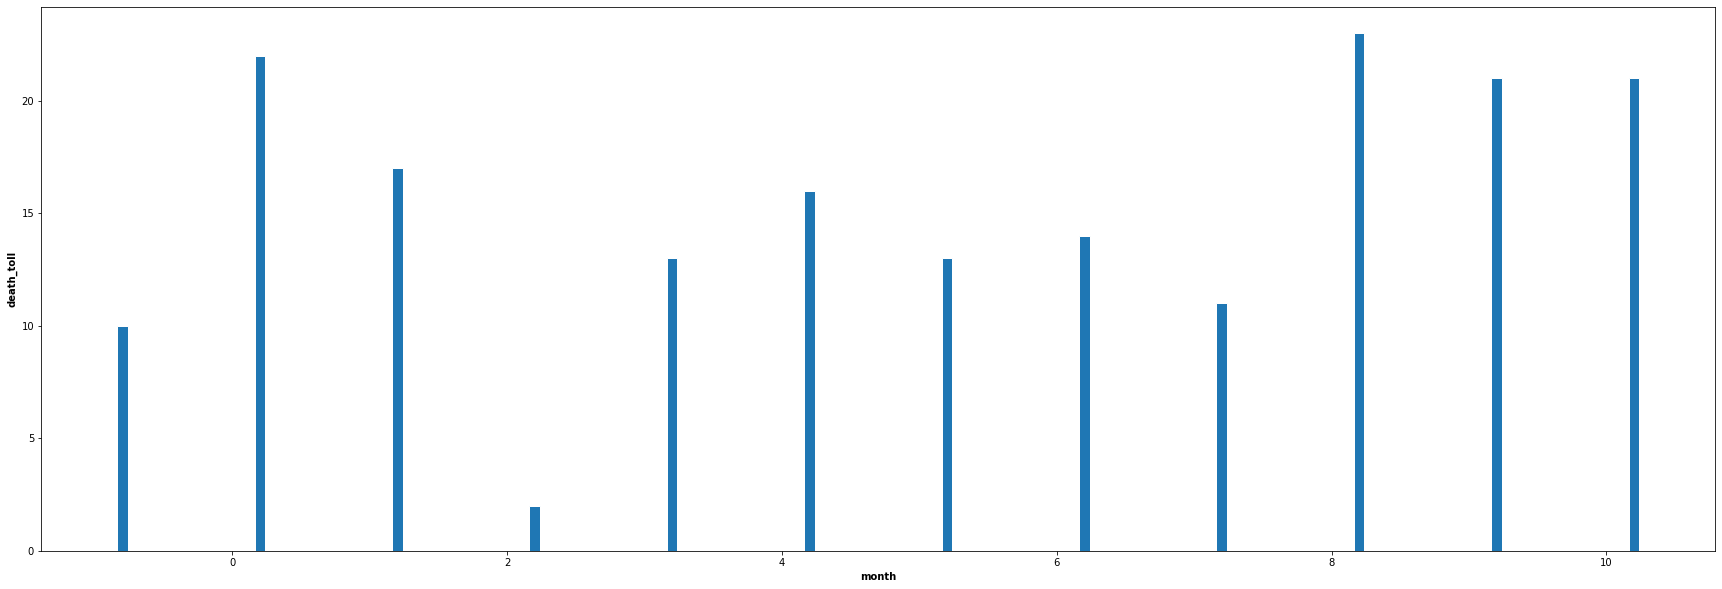

In [11]:
# fig, ax = plt.subplots()

def death_toll_show(data,plt,label,x):
    plt.subplot(231)
    plt.figure(figsize=(30, 10))
    month=["1","2","3","4","5","6","7","8","9","10","11","12"]
    dead_toll=[]
    width=1/13
    data_gb_month = data.groupby("Month")
    index = np.arange(len(month))
    for m in month:
        count=0
        
        number=len(data_gb_month.get_group((int(m))))
        data_gb_dt=data_gb_month.get_group(int(m)).head(number)
        for death_num in data_gb_dt['death_toll']:
#             print(death_num)
            count=count+death_num
        dead_toll.append(count)
    plt.bar(index+x, dead_toll, width=width, edgecolor='white',label=label)

year=101
x=-0.1
for data in dataset:
    death_toll_show(dataset[0],plt,str(year),x)
    x-=0.1
    year+=1
# Add xticks on the middle of the group bars
plt.xlabel('month', fontweight='bold')
plt.ylabel('death_toll', fontweight='bold')
plt.xticks([r-0.4 for r in range(len(month))], month)
 
# Create legend & Show graphic
plt.legend()
plt.show()

print(dead_toll)
    




In [ ]:
# Choose the height of the bars
x = []
y = []
for d in dead_toll:
    x.append(d[0])
for d in dead_toll:
    y.append(d[1])
    
print(x)
print(y)

plt.bar(x, y)